# Boosting Algorithm code from scratch using linear regression as the base learner

In [2]:
#STEP-1 import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#STEP-2 import dataset
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\china_gdp.csv")
print(df.head())
print(df.shape)

   Year        Value1  Value2
0  1960  5.918412e+10       2
1  1961  4.955705e+10       2
2  1962  4.668518e+10       2
3  1963  5.009730e+10       2
4  1964  5.906225e+10       2
(56, 3)


In [4]:
# STEP-3 preprocessing of data
df.apply(pd.to_numeric)
df = df.rename(columns={'Year': 'x1', 'Value1': 'y','Value2': 'x2'})
df.head()

,x1,y,x2
0,1960,5.918412e+10,2
1,1961,4.955705e+10,2
2,1962,4.668518e+10,2
3,1963,5.009730e+10,2
4,1964,5.906225e+10,2


In [5]:
#splitting in training and testing
training_data = df.iloc[:55,:]
testing_data=df.tail(1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 55
No. of testing examples: 1


In [6]:
#separating x and y
x=training_data.drop('y',axis=1)
y=training_data['y']
x_test=testing_data.drop('y',axis=1)
y_test=testing_data['y']
#converting into numpy arrays
x = np.array(x)
y = np.array(y)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [7]:
#standardlizing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
#x

In [8]:
 #initializing equal weights
# df['weights']=1/df.shape[0]  #1/total no. of rows 
weights = np.array([1/df.shape[0] for _ in range(len(x))])
weights = weights.reshape(weights.shape[0],)
weights

array([0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714,
       0.01785714, 0.01785714, 0.01785714, 0.01785714, 0.01785714])

In [9]:
#Training the model
#assumed value of m and c
m=np.random.randn(x.shape[1])
c=0

In [10]:
m

array([-0.29897422, -1.01943722])

In [11]:
mse_list=[]
epoch=[]     
lr=0.01
for i in range(100):
    for j in range(x.shape[1]):  
        x[:,j] *= weights
        y_pred=c+np.dot(x,m)
        loss=y_pred-y #calculating loss
        mse=np.mean((y-y_pred)**2)
        dm=np.dot(x.T,loss)
        dc=np.sum(loss)
        m = m - lr*dm
        c = c - lr*dc
    mse_list.append(mse)
    epoch.append(i)
    #labeling the loss values if loss>mean of loss then 1 else 0
    error_thresher = np.array([1 if j>loss.mean() else 0 for j in loss])
    error = np.sum(weights* error_thresher)
    #importance; performance
    imp = error/(1-error) 
    #update weights
    weights = np.array([weights[j]*np.exp(-imp) if error_thresher[j]==1 else weights[j]*np.exp(-imp) for j in range(len(weights))])

In [12]:
#checking coefficients of both feature
m

array([ 3.52775341e+10, -1.01943722e+00])

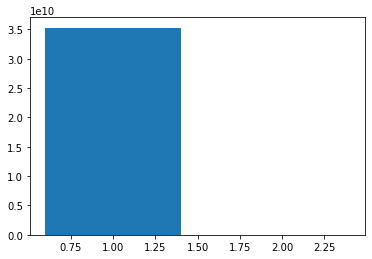

In [13]:
# plot feature importance
plt.bar([1,2],m)
plt.show()

In [15]:
y_pred[8]

1437854764969.2363

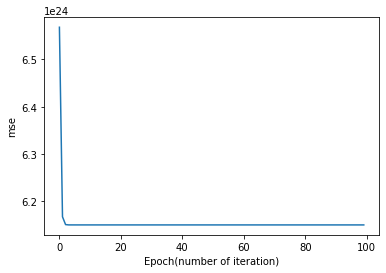

In [16]:
#plotting MSE plot with 100 iterations
plt.plot(epoch,mse_list)
plt.xlabel("Epoch(number of iteration)")
plt.ylabel("mse")
plt.show()

In [17]:
#testing
y_p=c+np.dot(x_test,m)
y_p

array([7.25220859e+13])

In [18]:
from sklearn.metrics import r2_score
a=r2_score(y,y_pred)
a

0.0

In [19]:
mse

6.150364622641049e+24

FROM SKLEARN

In [20]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
x, y = make_regression(n_features=2,random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x, y)
AdaBoostRegressor(n_estimators=100, random_state=0)
regr.predict(x_test)

array([231.93828876])

In [21]:
regr.score(x, y)

0.981507053619597

Feature: 0, Score: 87.91986
Feature: 1, Score: 16.88002


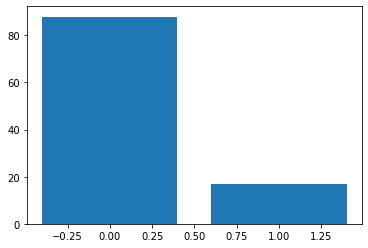

In [24]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
x, y = make_regression(n_samples=1000, n_features=2, n_informative=5, random_state=1)
# define the mod
model = LinearRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()